In [100]:
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# This script identifies which communication styles receive highest ranks
# For illustration purposes I defined 3 styles such as Passive, Assertive and Aggressive
# The list of key words must of course be extended

sql_conn = sqlite3.connect('reddit-comments-may-2015/database.sqlite')

# Can identify positive and negative sentiment from Vocab list positive_words.txt, negative_words.txt
    
passive_words = ['if you have the time','hmm','well','that was my fault','not sure', 'haha', 'yea', 
                 'yeah', 'no', 'fine'
                 'ok', 'okay', 'sorry', 'sure', 'thanks', 'thank you','funny','hilarious']

assertive_words = ['good idea','great idea','thanks for','good to know','really like', 'too',
                   'sorry for',
                  'yes', 'and','smart','witty']
    
aggressive_words = ['shot','fuck','fucking','ass','idiot','fuck off','stupid','but','dumb','lol'
                   'shit', 'bullshit', 'crap']

meforming_words = ['I', 'me', 'my', 'we', 'us', 'our', 'mine', 'myself', 'ourselves', 'ours']
    
sentiments = pd.DataFrame({'Passive': pd.Series(passive_words),
                         'Assertive': pd.Series(assertive_words),
                         'Aggressive': pd.Series(aggressive_words)
                         })

In [67]:
# Unnecessary columns
# 'author_flair_css_class','author_flair_text'
#'id','archived','link_id','score_hidden',
#'edited','removal_reason','archived','retrieved_on'

In [44]:
# https://github.com/reddit/reddit/wiki/JSON#data-structures
columns = ['created_utc','ups', 'subreddit_id', 'name', 'subreddit', 'gilded', 'downs', 'author',
 'score', 'body', 'distinguished', 'controversiality', 'parent_id']

In [98]:
df = pd.read_sql("""SELECT created_utc, ups, subreddit_id, name, subreddit, gilded, downs, author,
 score, body, distinguished, controversiality, parent_id 
                 FROM May2015 WHERE LENGTH(body) > 5 AND LENGTH(body) < 100 LIMIT 10000""", sql_conn)

In [82]:
contents = pd.DataFrame()

In [88]:
meformed = df[df.body.apply(lambda x: any(word in x.split() for word in meforming_words))]

In [89]:
meformed

,created_utc,ups,subreddit_id,name,subreddit,gilded,downs,author,score,body,distinguished,controversiality,parent_id
1,1430438400,4,t5_2qo4s,t1_cqug90h,nba,0,0,WyaOfWade,4,gg this one's over. off to watch the NFL draft...,None,0,t3_34g8mx
2,1430438400,3,t5_2qh1i,t1_cqug90k,AskReddit,0,0,beltfedshooter,3,"That the kid ""..reminds me of Kevin."" so sad...",None,0,t3_34fvry
10,1430438401,2,t5_2viyl,t1_cqug914,stevenuniverse,0,0,arrantSagacity,2,At least we got StevenBomb.,None,0,t1_cqucw6v
13,1430438401,1,t5_324pu,t1_cqug917,amiibo,0,0,code4geass,1,I would like to use them for training,None,0,t3_34gj60
15,1430438401,1,t5_2qh1i,t1_cqug91c,AskReddit,0,0,JuanTutrego,1,I'm a guy and I had no idea this was a thing g...,None,0,t1_cqtdj4m
17,1430438401,1,t5_2y6r4,t1_cqug91i,GlobalOffensiveTrade,0,0,Freakesport,1,thanks for your contribution :3\nIll still wai...,None,0,t1_cqug71d
32,1430438402,1,t5_2yt52,t1_cqug928,friendsafari,0,0,Yadir27,1,Added. I hope it is not too late. I'd really l...,None,0,t3_34f7d4
47,1430438403,9,t5_2ulfu,t1_cqug92u,gamegrumps,0,0,HopefulApplicant,9,"woulda been perfect if he had been like ""it's ...",None,0,t1_cqu10rl
51,1430438403,4,t5_342g7,t1_cqug932,fireemblemcasual,0,0,paper_roses,4,"Did well on my quiz today, am now eating ice c...",None,0,t3_34g8ok
56,1430438403,1,t5_323oy,t1_cqug93a,CasualConversation,0,0,Nik-ohki,1,I love malt vinegars.,None,0,t1_cqueabe


In [95]:
# find all top comments

In [96]:
# find if they are meforming or not

In [97]:
# histogram of number of top comments in meforming and informing

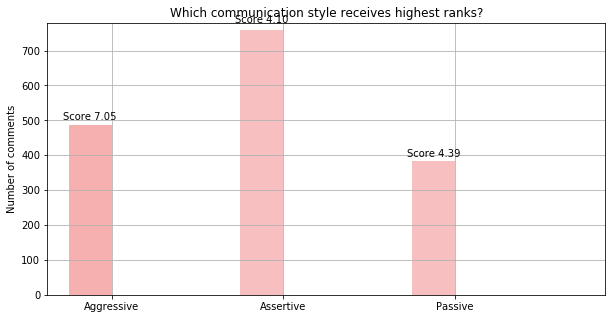

In [101]:
content_summary = pd.DataFrame()
contents = pd.DataFrame()
for sentiment in sentiments:
    content = df[df.body.apply(lambda x: any(word in x.split() for word in sentiments[sentiment]))]
    content_summary[sentiment] = content.describe().score

keys = content_summary.keys()
content_summary = content_summary.transpose()

# Setting the positions and width for the bars
pos = list(range(len(content_summary['count'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

clrs = []
for v in content_summary['mean'].values:
    if v < 2:
        clrs.append('#FFC1C1')
    elif v < 5:
        clrs.append('#F08080')
    elif v < 10:
        clrs.append('#EE6363')
    else:
        clrs.append('r')

plt.bar(pos,
        content_summary['count'],
        width,
        alpha=0.5,
        # with color
        color=clrs,
        label=keys)

# Set the y axis label
ax.set_ylabel('Number of comments')

# Set the chart's title
ax.set_title('Which communication style receives highest ranks?')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(keys)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(content_summary['count'])+20])

rects = ax.patches

# Now make some labels
for ii,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%s'% ("Score {0:.2f}".format(content_summary['mean'][ii])),
                 ha='center', va='bottom')

plt.grid()

plt.savefig("CommunicationStyles.png")